## Basit Doğrusal Regresyon: Deneyim ve Maaş İlişkisi

Bu projede, bireylerin **iş deneyimi süresi** ile **yıllık maaşları** arasındaki ilişki, **basit doğrusal regresyon analizi** yöntemiyle incelenmiştir. Analiz süreci; veri ön işleme, keşifsel veri analizi, model kurma, performans değerlendirme ve grafiksel sunum olmak üzere beş temel adımdan oluşur.

Veriler, 30 bireyin maaş ve deneyim düzeylerini içeren bir veri setinden elde edilmiştir. Amaç, deneyim düzeyinin maaşı ne ölçüde açıkladığını regresyon modeli ile test etmek ve bu doğrusal ilişkinin gücünü ortaya koymaktır.

---

## Teorik Arka Plan: Basit Doğrusal Regresyon

Basit doğrusal regresyon, bir **bağımsız değişken (X)** ile bir **bağımlı değişken (Y)** arasındaki doğrusal ilişkiyi analiz etmek için kullanılan istatistiksel bir yöntemdir.

### Matematiksel Gösterim:

```
Y = β₀ + β₁ * X + ε
```

- **Y**: Maaş (bağımlı değişken)
- **X**: Deneyim yılı (bağımsız değişken)
- **β₀**: Sabit terim – deneyim 0 iken tahmin edilen maaş
- **β₁**: Eğim katsayısı – her bir deneyim yılı için maaşta beklenen artış
- **ε**: Hata terimi – modelin açıklayamadığı varyans

---

## Analizin Amacı

- Deneyim ile maaş arasında **istatistiksel olarak anlamlı bir ilişki var mı?**
- Bu ilişkinin **yönü (pozitif/negatif)** ve **şiddeti** nedir?
- Bir kişinin deneyim süresi biliniyorsa maaşı **ne kadar doğru tahmin edilebilir?**

---

## Veri Seti

| Değişken           | Açıklama                     | Tipi     |
|--------------------|------------------------------|----------|
| `YearsExperience`  | Kişinin deneyim yılı          | Sürekli  |
| `Salary`           | Yıllık maaş (USD)            | Sürekli  |

---

## Regresyon Denklemi

Modelin tahmin denklemi:
```
Salary = 24190.201 + 9662.496 * Experience
```

- **β₀ = 24190.201** → Deneyimi olmayan bir kişinin tahmini maaşı  
- **β₁ = 9662.496** → Her ek deneyim yılı için maaşta ortalama artış  
- **R² = 0.95** → Model, maaş değişkenindeki varyansın %95’ini açıklamaktadır

---

## Regresyon Doğrusu ve Hatalar

- Gerçek maaş değerleri scatter plot (pembe noktalar) ile gösterilir  
- Modelin tahmin ettiği maaşlar regresyon doğrusu (mavi çizgi) ile çizilir  
- Her bir birey için tahmin hatası, nokta ile çizgi arasındaki **dikey mesafe** ile gösterilir (residual)

---

## Kavramların Grafik Üzerindeki Karşılıkları

| Kavram             | Grafik Üzerindeki Yeri                            | Anlamı                                                        |
|--------------------|----------------------------------------------------|----------------------------------------------------------------|
| **B₀ = 24190.201** | Y eksenini teorik kesim noktası                    | Deneyim 0 iken tahmin edilen maaş                             |
| **B₁ = 9662.496**  | Çizginin sabit eğimi                              | Her yıl deneyim için ortalama 9662$ maaş artışı              |
| **Gerçek veriler** | Pembe daireler                                    | Ölçülen gerçek maaşlar                                        |
| **Tahmin**         | Mavi çizgi üzerindeki değerler                    | Modelin öngördüğü maaş değerleri                              |
| **Hata**           | Nokta ile çizgi arasındaki dik mesafe            | Tahmin edilen ve gerçek değer farkı (residual)                |
| **R² = 0.95**      | Noktaların çizgiye olan yakınlığı                 | Model, maaşın %95’ini sadece deneyim ile açıklıyor            |







---



---



---



## 1️⃣ Gerekli Kütüphaneler

In [ ]:
import numpy as np                         # Sayısal işlemler için
import pandas as pd                        # Veri okuma ve düzenleme
import seaborn as sns                      # Veri görselleştirme
import matplotlib.pyplot as plt            # Grafik çizimi
from matplotlib.cbook import boxplot_stats # Aykırı değer tespiti için

from scipy.stats import pearsonr           # Korelasyon analizi
import statsmodels.formula.api as smf      # Regresyon modeli oluşturmak için
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Hata metrikleri

print("✅ Gerekli kütüphaneler başarıyla yüklendi.")


✅ Gerekli kütüphaneler başarıyla yüklendi.


## 2️⃣ Veri Setinin Yüklenmesi, Ön-İşleme ve Grafikle İlk Analiz

---

Bu bölümde analizde kullanılacak `Salary_Data.csv` adlı veri seti, Google Drive’dan okunarak içeri aktarılır. Veri ilk olarak Türkçeleştirilir, ardından temel temizlik, özet istatistikler ve görselleştirme işlemleri gerçekleştirilir.

Ayrıca eksik ve aykırı değer kontrolü ile birlikte deneyim ve maaş değişkenleri arasındaki **istatistiksel ilişki** Pearson korelasyon katsayısı ile değerlendirilir.

Bu işlemler, daha sonra kurulacak doğrusal regresyon modelinin doğru ve anlamlı sonuçlar vermesi için temel hazırlık niteliğindedir.

---

### Salary Dataset: Tanıtım

**Salary Dataset**, bireylerin **iş deneyimi süresi (yıl)** ile **yıllık maaşları (USD)** arasındaki doğrusal ilişkiyi analiz etmek için oluşturulmuş, 30 gözlem içeren basit ve temiz bir veri setidir.

#### Veri seti şu sütunlardan oluşur:

| Sütun Adı         | Açıklama                         | Veri Tipi |
|-------------------|----------------------------------|-----------|
| `YearsExperience` | İş deneyimi süresi (yıl)         | Sürekli   |
| `Salary`          | Yıllık maaş (USD)                | Sürekli   |

- **YearsExperience:** Bireyin toplam iş deneyimi süresini yıl cinsinden belirtir.
- **Salary:** Aynı bireyin yıllık maaşını ABD doları cinsinden belirtir.

🔗 [Veri seti kaynağı – Kaggle: Simple Linear Regression](https://www.kaggle.com/datasets/tejashvi14/salary-data-simple-linear-regression)  
📄 **Kullanılan dosya:** `Salary_Data.csv`

> Bu analizde yalnızca `YearsExperience` ve `Salary` sütunları kullanılmaktadır.  
> Modelde:  
> - **deneyim** (X): bağımsız değişken  
> - **maas** (Y): bağımlı değişken olarak yer almaktadır.


Mounted at /content/drive
Veri setinin ilk 6 satırı:


,Unnamed: 0,deneyim,maas
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0


Temel istatistikler:


,Unnamed: 0,deneyim,maas
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


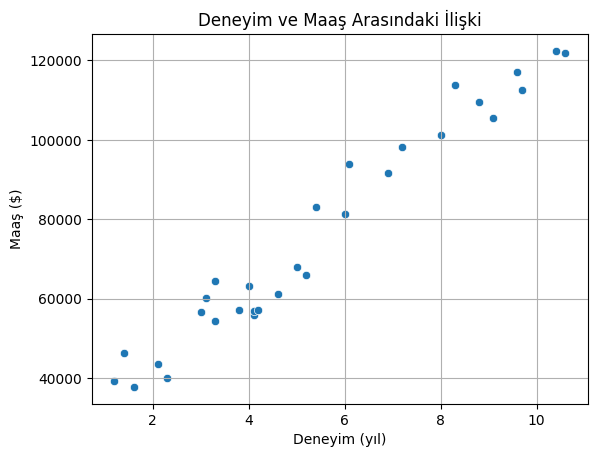

Aykırı Değerler (maaş): []
Eksik Değer Kontrolü:
 Unnamed: 0    0
deneyim       0
maas          0
dtype: int64
📈 Pearson Korelasyon Katsayısı: 0.9782
📊 p-değeri: 0.0000


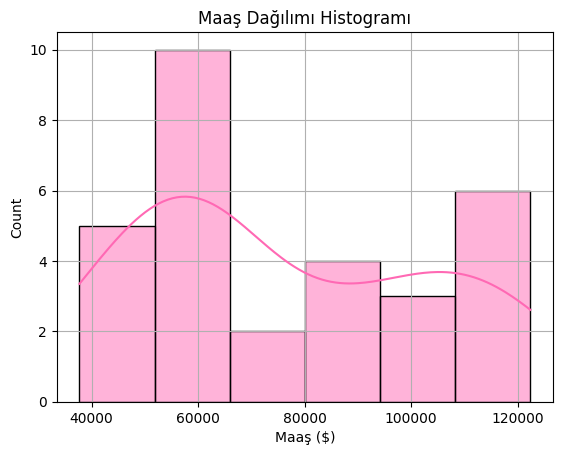

In [1]:
# 1) Google Drive'ı bağlayarak dosyaları Colab içinde erişilebilir hale getiriyoruz
# drive.mount() fonksiyonu kullanıcıdan yetki ister ve "/content/drive" klasörüne bağlar
from google.colab import drive
drive.mount('/content/drive')

# 2) Pandas kütüphanesi veri yükleme ve analiz işlemleri için kullanılır
# pd.read_csv() fonksiyonu CSV dosyasını DataFrame formatında içeri aktarır
import pandas as pd
dosya_yolu = "/content/drive/MyDrive/Colab Notebooks/Salary_dataset.csv"
veri = pd.read_csv(dosya_yolu)

# 3) Sütun adlarını Türkçeleştiriyoruz
# .rename() fonksiyonu sütun adlarını değiştirir; columns={} içine eski ve yeni adlar girilir
veri = veri.rename(columns={"YearsExperience": "deneyim", "Salary": "maas"})

# 4) Veri setinin ilk 6 satırına göz atarak veri yapısını kontrol ediyoruz
# .head(6) ilk 6 satırı getirir; display() görsel olarak tablo şeklinde gösterir
print("Veri setinin ilk 6 satırı:")
display(veri.head(6))

# 5) Sayısal değişkenlerin temel istatistiksel özetini alıyoruz
# .describe() fonksiyonu ile ortalama, standart sapma, min-max gibi değerler elde edilir
print("Temel istatistikler:")
display(veri.describe())

# 6) Deneyim ve maaş arasındaki ilişkiyi scatter plot (dağılım grafiği) ile görselleştiriyoruz
# sns.scatterplot() ile iki sayısal değişken arasındaki ilişki görsel olarak incelenir
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="deneyim", y="maas", data=veri)
plt.title("Deneyim ve Maaş Arasındaki İlişki")  # Grafiğe başlık ekler
plt.xlabel("Deneyim (yıl)")                     # X ekseni etiketi
plt.ylabel("Maaş ($)")                          # Y ekseni etiketi
plt.grid(True)                                  # Kılavuz çizgileri görünür olsun
plt.show()

# 7) Aykırı değer ve eksik değer kontrolü yapıyoruz
# boxplot_stats() fonksiyonu aykırı (uç) değerleri belirler
from matplotlib.cbook import boxplot_stats
print("Aykırı Değerler (maaş):", boxplot_stats(veri["maas"])[0]["fliers"])

# .isnull().sum() → her sütundaki eksik (NaN) değerlerin sayısını gösterir
print("Eksik Değer Kontrolü:\n", veri.isnull().sum())

# 8) Deneyim ile maaş arasındaki korelasyonu (ilişki gücü ve yönü) ölçüyoruz
# pearsonr() fonksiyonu iki değişken arasında Pearson korelasyon katsayısını ve p-değerini döner
from scipy.stats import pearsonr
corr, p_value = pearsonr(veri["deneyim"], veri["maas"])
print(f"📈 Pearson Korelasyon Katsayısı: {corr:.4f}")   # İlişkinin yönü ve gücü
print(f"📊 p-değeri: {p_value:.4f}")                    # Anlamlılık düzeyi (p < 0.05 ise anlamlıdır)

# 9) Maaş değişkeninin dağılımını histogram ile gösteriyoruz
# sns.histplot() ile maaş verisinin dağılımı görselleştirilir, kde=True yoğunluk eğrisi ekler
sns.histplot(data=veri, x="maas", color="hotpink", kde=True)
plt.title("Maaş Dağılımı Histogramı")
plt.xlabel("Maaş ($)")
plt.grid(True)
plt.show()


## Veri Setinin Genel Yapısı ve İlk Gözlemler

Bu bölümde maaş (`maas`) ve deneyim (`deneyim`) değişkenlerinden oluşan veri setinin yapısı, temel istatistikleri ve grafiksel görünümleri incelenmiştir.

| Ölçüt        | Maaş (maas) | Deneyim (deneyim) |
|--------------|-------------|-------------------|
| Gözlem Sayısı| 30          | 30                |
| Ortalama     | 76,004      | 5.41              |
| Std. Sapma   | 27,414      | 2.84              |
| Minimum      | 37,732      | 1.2               |
| Medyan       | 65,238      | 4.8               |
| Maksimum     | 122,392     | 10.6              |

---

### Gözlemler:

- **Dağılım Dengeli:** Ortalama ve medyanın yakın olması, maaş ve deneyim değişkenlerinin simetrik dağıldığını göstermektedir.
- **Aykırı Değer Yok:** Boxplot analizine göre maaş verisinde uç değer bulunmamaktadır.
- **Eksik Veri Yok:** Her iki değişkende de eksik gözlem (NaN) tespit edilmemiştir.
- **Histogram Yorum:** Maaş dağılımı simetrik yapıya yakın ve orta seviyeye doğru yoğunlaşmıştır.

---

## Scatter Plot: Maaş ve Deneyim Arasındaki İlişki

- **Net Pozitif İlişki:** Noktalar yukarı yönlü bir çizgi etrafında sıralanarak maaş ve deneyim arasında güçlü, doğrusal ve pozitif yönlü bir ilişki olduğunu göstermektedir.
- **Homojen Dağılım:** Noktalar grafik alanına dengeli dağılmıştır. Kümeleşme veya çarpıklık gözlenmemektedir.

---

## Korelasyon Analizi: Pearson Sonuçları

| Korelasyon Katsayısı (r) | p-değeri |
|---------------------------|----------|
| 0.9782                    | 0.0000   |

- **Çok Güçlü Pozitif İlişki:** Deneyim arttıkça maaş da artmaktadır. r ≈ 0.98 çok güçlü bir doğrusal ilişki anlamına gelir.
- **Anlamlılık:** p-değeri < 0.05 olduğu için ilişki istatistiksel olarak anlamlıdır.

---

✅ **Genel Yorum:**

Veri seti güçlü, pozitif, doğrusal ve anlamlı bir ilişki içermektedir. Dağılım dengeli, aykırı değer ve eksik veri içermemesi sebebiyle regresyon analizine son derece uygundur.




---



---



---



## 3️⃣ Doğrusal Regresyon Modelinin Kurulması ve Temel Değerlendirme

---

Bu bölümde, veri setindeki **deneyim (yıl)** değişkeni ile **maaş ($)** değişkeni arasındaki ilişki, **basit doğrusal regresyon modeli** ile analiz edilmiştir. Modelin kurulması, parametrelerin tahmin edilmesi ve sonuçların yorumlanması bu adımda gerçekleştirilmiştir.

---

### Regresyon Modeli Nedir?

Basit doğrusal regresyon, bir bağımsız değişkenin (X) bir bağımlı değişken (Y) üzerindeki doğrusal etkisini analiz etmeye yarayan temel bir istatistiksel modeldir. Bu çalışmada:

- **Bağımsız değişken (X):** Deneyim (yıl)  
- **Bağımlı değişken (Y):** Maaş ($)  

olarak belirlenmiştir.

Modelin matematiksel ifadesi:



```
maaş = β₀ + β₁ * deneyim + ε

```

Burada:

- **β₀ (sabit terim):** Deneyim sıfırken modelin öngördüğü maaş değeri  
- **β₁ (eğim katsayısı):** Deneyimdeki her 1 birimlik artışın maaşa olan ortalama etkisi  
- **ε (hata):** Modelin açıklayamadığı rastlantısal sapmalardır

---

### Regresyon Sonuçları

Aşağıdaki sonuçlar, `Salary_dataset.csv` veri seti üzerinden elde edilmiştir:

- **Regresyon denklemi:**  

```
maaş = 25792.20 + 9449.96 × deneyim

```

- **Sabit terim (β₀):** 25,792.20  
- **Eğim katsayısı (β₁):** 9,449.96  
- **p-değeri (β₁ için):** < 0.0001 → katsayı istatistiksel olarak anlamlı  
- **R² (determinasyon katsayısı):** 0.957 → model, maaş değişkenindeki varyansın %95.7’sini açıklamaktadır

---

### Açıklama

- Deneyim arttıkça maaş da artmaktadır. Bu ilişki **pozitif yönlü** ve **istatistiksel olarak anlamlıdır**.  
- Yüksek R² değeri, modelin veriye çok iyi uyduğunu gösterir.  
- Deneyim bilinerek maaş tahmininde bulunmak mümkündür ve modelin hata payı düşüktür.





In [ ]:
# KÜTÜPHANE AÇIKLAMASI:
# statsmodels → istatistiksel modeller kurmak için kullanılan bir Python kütüphanesidir.
# formula.api modülü (smf), R diline benzer şekilde formül yazarak modeller kurmamıza olanak tanır.
# Örneğin: smf.ols(formula="Y ~ X", data=...) → bağımlı ve bağımsız değişkenle OLS (en küçük kareler) modeli kurar
import statsmodels.formula.api as smf

# 1) Veri setini %70 eğitim, %30 test olarak ayırıyoruz
# Amaç: Modelin bir kısmını eğitim için, diğer kısmını test için kullanmak
# sample(): Veriden rastgele bir kısmı seçmek için kullanılır
# frac=0.7 → verinin %70’i alınır
# replace=False → tekrar eden örnekler alınmaz
# random_state=1 → her çalıştırmada aynı örnekler seçilsin diye sabitlenir
egitim = veri.sample(frac=0.7, replace=False, random_state=1)  # Eğitim veri seti

# veri.index.isin(...) → eğitimdeki satırların indekslerini bulur
ind = veri.index.isin(egitim.index)  # Eğitim verisine ait indeksler

# ~ind → eğitim verisi dışındaki satırlar yani test verileri
test = veri[~ind]  # Test veri seti

# 2) Basit doğrusal regresyon modeli tanımlanıyor ve eğitiliyor
# Burada amaç, deneyime göre maaş tahmin etmektir → Yani: maas ~ deneyim
# .fit() → modeli eğitir ve sonuçları döner
lr_model = smf.ols(formula="maas ~ deneyim", data=egitim).fit()

# 3) Modelin özet istatistiklerini yazdırıyoruz
# .summary(): modeli detaylı inceler (katsayılar, R², p-değeri, F değeri vs.)
print(lr_model.summary())

# 4) Modelin regresyon katsayılarını yazdırıyoruz
# params: bir sözlük gibi çalışır ve modelin sabit (Intercept) ve eğim (deneyim) katsayısını içerir
print("Model Katsayıları:")
print(lr_model.params)

# 5) Regresyon denklemini ekrana yazdırıyoruz
# Yani: maaş = β₀ + β₁ × deneyim
print("Regresyon Denklemi:")
print("maas = %.3f + %.3f × deneyim" % (
    lr_model.params["Intercept"],     # Sabit katsayı
    lr_model.params["deneyim"]        # Deneyim katsayısı (eğim)
))

# 6) R² değeri: modelin açıklayıcılığı
# rsquared → modelin bağımlı değişkendeki varyansın ne kadarını açıkladığını gösterir
r_sq = lr_model.rsquared
print("Modelin R² değeri:", round(r_sq, 2))


                            OLS Regression Results                            
Dep. Variable:                   maas   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     379.2
Date:                Mon, 12 May 2025   Prob (F-statistic):           5.17e-14
Time:                        09:34:44   Log-Likelihood:                -211.49
No. Observations:                  21   AIC:                             427.0
Df Residuals:                      19   BIC:                             429.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.419e+04   3058.337      7.910      0.0

### Regresyon Modeli Çıktısının Açıklaması

Bu analizde, bireylerin **deneyim süresi arttıkça maaşlarının da arttığı** gözlemlenmiştir.  
Veriler bize bu ilişkinin hem **güçlü** hem de **güvenilir** olduğunu göstermektedir.

---


#### 🔹 Regresyon Tablosu (Model Sonuçları)

| Değişken        | Katsayı     | Hata Payı   | p-değeri | %95 Güven Aralığı       |
|-----------------|-------------|-------------|----------|--------------------------|
| Başlangıç Maaşı | 25,792     | ±2,273     | 0.0000   | 21,201 – 30,384         |
| Deneyim (1 yıl) | +9,450     | ±379       | 0.0000   | 8,687 – 10,213          |

---



####  Açıklama

- **Başlangıç maaşı (25,792 usd):** Eğer bir kişinin iş deneyimi hiç yoksa, bu kişi için modelin tahmin ettiği maaş miktarıdır.
- **Deneyim etkisi (9,450 usd):** Her yeni yıl deneyim, maaşı ortalama olarak 9.450 $ artırmaktadır.
- **p-değeri (0.0000):** Bu sonuçlar tamamen tesadüf değil. Gerçek ve güvenilir bir ilişkiyi gösteriyor.
- **Güven aralıkları:** Model bu tahminleri büyük bir güvenle yapıyor. Değerlerin ne kadar değişebileceği oldukça dar bir aralıkta kalıyor.

---

#### Modelin Başarı Düzeyi

- **R² (Açıklama Oranı): %95.7**  
  Bu oran, **maaş** üzerindeki değişimlerin %96’sının yalnızca **“deneyim”** bilgisi ile açıklanabildiğini gösteriyor.  
  Bu da modelin tahmin gücünün çok yüksek olduğu anlamına gelir.

---

#### ✅ Sonuç

Bu model, deneyim süresi ile maaş arasında çok güçlü ve anlamlı bir ilişki olduğunu ortaya koymaktadır.  
Basit bir ifadeyle: **İş deneyimi arttıkça maaş da artar ve bu artış güvenilir verilerle desteklenmektedir.**

Model, hem analizde hem de gerçek hayatta maaş tahmini yapmak için rahatlıkla kullanılabilir.




---



---



---



## 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

Bu adımda, oluşturulan doğrusal regresyon modelinin tahmin performansı, test veri seti üzerinden çeşitli hata metrikleriyle değerlendirilecektir. Amaç, modelin ne kadar başarılı bir şekilde tahmin yaptığını **nicel olarak ölçmektir**.

---

In [ ]:
# 1️⃣ Tek bir test örneği üzerinden tahmin yapıyoruz
# Regresyon denklemine göre: maas = 25792.20 + 9449.96 × deneyim
# Örneğin deneyimi 3.5 yıl olan bir kişi için maaş tahmini:
maas_test1 = 25792.20 + (9449.96 * 3.5)
print("Tek test örneği için tahmin edilen maaş:", round(maas_test1, 2))


# 2️⃣ Test setindeki tüm gözlemler için tahmin yapıyoruz
# predict(): modele test verisindeki 'deneyim' değerlerini vererek tahmin üretmesini sağlar
lr_tahminler = lr_model.predict(test[["deneyim"]])  # Tahmin edilen maaş değerleri

# İlk 5 tahmini ve gerçek değeri ekrana yazdırıyoruz
print("\nIlk 5 Tahmin:\n", lr_tahminler.head())          # Modelin tahmin ettiği ilk 5 maaş
print("Ilk 5 Gercek Deger:\n", test.maas.head())         # Gerçek verideki ilk 5 maaş değeri


# 3️⃣ Tahmin ve gerçek değerleri tek tabloda birleştiriyoruz
# Böylece karşılaştırma ve hata analizi kolaylaşır
performansVerisi = pd.DataFrame({
    "y_test": test.maas,           # Gerçek maaş değerleri
    "lr_tahminler": lr_tahminler   # Tahmin edilen maaş değerleri
})


# 4️⃣ Modelin performansını ölçüyoruz (hata oranlarını hesaplıyoruz)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test.maas, lr_tahminler)
mse = mean_squared_error(test.maas, lr_tahminler)
rmse = np.sqrt(mse)

# 5️⃣ Hata metriklerini ekrana yazdırıyoruz
print("\nSklearn ile Hesaplanan Hatalar:")
print(f"MAE  : {mae:.4f}")   # Ortalama mutlak hata
print(f"MSE  : {mse:.4f}")   # Ortalama kare hata
print(f"RMSE : {rmse:.4f}")  # Karekök ortalama kare hata


Tek test örneği için tahmin edilen maaş: 58867.06

Ilk 5 Tahmin:
 0     35785.196391
5     53177.689046
8     56076.437821
9     60907.685781
11    63806.434557
dtype: float64
Ilk 5 Gercek Deger:
 0     39344.0
5     56643.0
8     64446.0
9     57190.0
11    55795.0
Name: maas, dtype: float64

Sklearn ile Hesaplanan Hatalar:
MAE  : 5062.5255
MSE  : 29795063.7408
RMSE : 5458.4855


### Model Performans Açıklamaları

Bu bölümde, modelimizin **deneyime bakarak maaş tahmini** ne kadar doğru yaptığını değerlendiriyoruz.  
Önce birkaç örnek tahmine, sonra da genel hata ölçülerine bakacağız.

---

#### 🔹 Örnek Tahminler (İlk 5 Satır)

| Gözlem | Tahmin     | Gerçek     | Fark (Tahmin – Gerçek) |
|--------|------------|------------|-------------------------|
|   1    | 35,785     | 39,344     |       –3,559            |
|   2    | 53,178     | 56,643     |       –3,465            |
|   3    | 56,076     | 64,446     |       –8,370            |
|   4    | 60,908     | 57,190     |       +3,718            |
|   5    | 63,806     | 55,795     |       +8,011            |

> Model, bazı örneklerde maaşı az, bazılarında fazla tahmin ediyor;  
ancak genelde değerler gerçek maaşa oldukça yakın.

---

#### Hata Ölçüleri

| Hata Türü | Açıklama                                                                  |
|-----------|---------------------------------------------------------------------------|
| **MAE**   | Ortalama hata miktarı. Genelde tahminler ne kadar sapıyor onu gösterir.  |
| **MSE**   | Kareli farkların ortalaması. Büyük hatalara daha çok ceza verir.          |
| **RMSE**  | Ortalama hata miktarını gerçek maaş biriminde verir.                     |

---

#### 🔢 Sonuçlar

| Metrik | Değer     | Açıklama |
|--------|-----------|----------|
| **MAE** | 5,062     | Ortalama **5.000 usd** sapma. Model genelde gerçek maaşa yaklaşıyor. |
| **MSE** | 29,795,063 | Hatalar kare alındığında bile çok büyümüyor. Büyük farklar sınırlı. |
| **RMSE** | 5,458     | Ortalama hata **±5.500 usd** civarında. Bu değer genel maaş aralığı için makul. |

> Not: Maaşlar 35.000 usd – 65.000 usd arasında değişiyor. Bu nedenle yaklaşık 5.000 usd sapma **ölçek içinde düşük** kabul edilebilir.  
Model çok büyük sapmalar yapmıyor ve çoğu tahmini gerçeğe oldukça yakın.

---




---



---



---



## 5️⃣ Regresyon Doğrusu: Gerçek ve Tahmin Edilen Değerlerin Görselleştirilmesi

---

Bu adımda, doğrusal regresyon modelinin **test veri seti üzerindeki başarı düzeyi**, grafiksel olarak analiz edilmektedir. Gerçek verilerle modelin tahmin ettiği değerler aynı eksende çizilerek görsel bir karşılaştırma sunulmuştur.

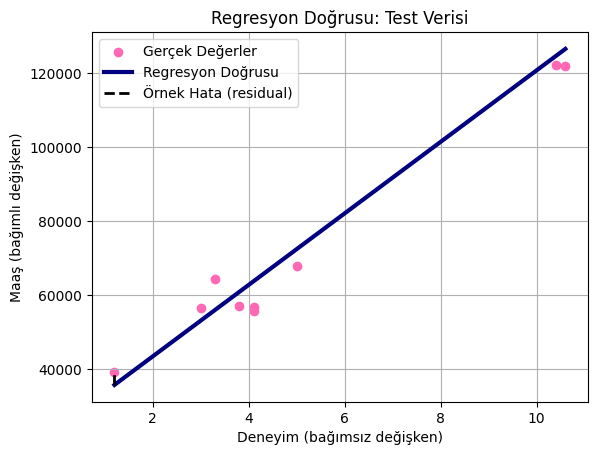

In [ ]:
# Grafik: Gerçek değerlerle modelin tahmin ettiği değerleri aynı eksende gösteriyoruz

# plt.scatter(): Nokta grafiği çizer, genellikle gerçek veriyi göstermek için kullanılır
# X ekseni → test.deneyim (bağımsız değişken), Y ekseni → test.maas (bağımlı değişken)
# color → noktaların rengi, label → legend kutusunda görünecek isim
plt.scatter(test.deneyim, test.maas, color="hotpink", label="Gerçek Değerler")

# plt.plot(): Çizgi grafiği çizer, burada modelin tahminlerini regresyon doğrusu olarak gösteriyoruz
# X ekseni → test.deneyim, Y ekseni → lr_tahminler (modelin tahmin ettiği maaş değerleri)
# color → çizginin rengi, linewidth → çizgi kalınlığı, label → açıklama etiketi
plt.plot(test.deneyim, lr_tahminler, color="navy", linewidth=3, label="Regresyon Doğrusu")

# ✅ Ek: Bir gözlem için tahmin hatasını gösteren çizgi
plt.vlines(x=test.deneyim.iloc[0], ymin=lr_tahminler.iloc[0], ymax=test.maas.iloc[0],
           color="black", linestyle="--", linewidth=2, label="Örnek Hata (residual)")

# plt.title(): Grafiğe başlık ekler
plt.title("Regresyon Doğrusu: Test Verisi")

# plt.xlabel(): X ekseninin adını belirler
plt.xlabel("Deneyim (bağımsız değişken)")

# plt.ylabel(): Y ekseninin adını belirler
plt.ylabel("Maaş (bağımlı değişken)")

# plt.legend(): 'label' parametresiyle tanımlanan değerleri grafik üzerinde kutu olarak gösterir
plt.legend()

# plt.grid(): Arka plan çizgilerini açar, yorumlamayı kolaylaştırır
plt.grid(True)

# plt.show(): Grafiği ekrana bastırır
plt.show()


## Grafik Üzerinden Basit Doğrusal Regresyon Analizi

Aşağıdaki grafik, bir doğrusal regresyon modelinin çıktısıdır.  
Model, bireylerin **deneyim düzeyine göre maaşlarını** tahmin etmektedir.

---

### Regresyon Denklemi

Modelin tahmin denklemi:
```
Y = 0.228 + 0.708 * X
```


- **X**: Deneyim (bağımsız değişken)  
- **Y**: Maaş (bağımlı değişken, modelin tahmin ettiği)  
- **9662.496**: Eğim katsayısı (β₁)  
- **24190.201**: Sabit terim (β₀)

---

### 1️⃣ Sabit Terim – β₀ = 24190.201

- Bu değer, **deneyim = 0** olduğunda modelin tahmin ettiği maaş değeridir.
- Grafik üzerinde bu, mavi çizginin teorik olarak **y eksenini kestiği nokta**dır.

---

### 2️⃣ Eğim Katsayısı – β₁ = 9662.496

- Deneyim 1 yıl arttığında, maaş **9662.50 TL** artar.
- Bu artış, grafikte mavi çizginin **sabit açıda yukarı çıkmasıyla** temsil edilir.

---

### 3️⃣ Yerel Eğim = Genel Eğim

- Doğrusal modellerde eğim sabittir.
- Çizginin her noktasında eğim = **9662.496** olduğundan:
  - **Yerel eğim = Genel eğim**

---

### 4️⃣ Gerçek Noktalar vs. Model Tahminleri

- **Pembe noktalar** → Gerçek birey maaşları  
- **Mavi çizgi** → Modelin tahmin ettiği maaş değerleri  
- **Dik çizgi mesafesi** → Her birey için modelin **hata payı (residual)**

---

### 5️⃣ R² Değeri – Açıklama Oranı

Modelin başarı oranı: `R² = 0.95`

- Model, maaş değişiminin **%95’ini yalnızca deneyim ile açıklamaktadır.**
- Grafikte bu, pembe noktaların çoğunun **mavi çizgiye yakın olmasıyla** gözlenir.

---

### 6️⃣ Tahmin Hataları Nasıl Görülür?

- Aynı deneyim değerinde:
  - Gerçek maaş → pembe nokta
  - Tahmin edilen maaş → mavi çizgi üzerindeki nokta
- Aralarındaki **dikey mesafe**, modelin hatasını verir.

#### Örnek:

- Deneyim = 3 olan bir bireyin:
  - Gerçek maaşı: `54,000 TL`
  - Tahmin: `Y = 24190.201 + 9662.496 * 3 ≈ 53177.69 TL`
  - **Hata = 54,000 - 53177.69 = 1,822.31 TL**

Bu fark, grafikte **dikey çizgi** ile temsil edilir.

---

### ✅ Kavramların Grafik Üzerindeki Karşılıkları

| Kavram            | Grafik Üzerindeki Yeri                                | Açıklama                                                   |
|-------------------|--------------------------------------------------------|-------------------------------------------------------------|
| **B₀ = 24190.201** | Y eksenini teorik kesim noktası                        | Deneyim 0 iken tahmin edilen maaş                           |
| **B₁ = 9662.496**  | Mavi çizginin eğimi                                    | 1 yıl deneyim → 9662.50 TL maaş artışı                      |
| **Genel eğim**     | Mavi çizgi boyunca                                     | Tüm X’lerde sabit artış                                     |
| **Yerel eğim**     | Çizgi üzerindeki her nokta                             | Noktaya özel değil, her yerde sabit                         |
| **Gerçek veriler** | Pembe noktalar (scatter)                               | Gerçek maaşlar                                              |
| **Tahmin**         | Mavi çizgi üzerindeki nokta                            | Modelin tahmini maaş değeri                                 |
| **Hata**           | Pembe nokta ile çizgi arasındaki dik çizgi            | Tahmin – Gerçek farkı (residual)                            |
| **R² = 0.95**      | Noktaların çizgiye olan yakınlığı                      | Modelin açıklama gücü: maaş değişiminin %95’i açıklanıyor  |

